<a href="https://colab.research.google.com/github/dbengp/Data_Science_Alura_Challenges/blob/main/Projeto_Data_Science_Alura_Challenge_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Vendas e Desempenho - Alura Store

### Contexto

Este projeto tem como objetivo analisar o desempenho de quatro lojas do e-commerce Alura Store para ajudar o Sr. João a decidir qual delas vender para investir em um novo negócio. Como analista de dados, a tarefa é identificar a loja com o menor desempenho, utilizando métricas-chave para embasar a decisão.

---

### Mão na Massa

A seguir, a análise será dividida em etapas:

1.  **Importação de Bibliotecas e Dados**: Carregamento dos dados das quatro lojas.
2.  **Análise de Métricas**: Avaliação do faturamento, popularidade de categorias, avaliações, produtos mais vendidos e custo de frete.
3.  **Visualização de Dados**: Criação de gráficos para uma compreensão visual dos resultados.
4.  **Relatório Final**: Elaboração de um relatório para o Sr. João, com a recomendação final e a justificativa.

In [2]:
## 1. Importação de Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## 2. Carregamento e Preparação dos Dados

# Links dos arquivos CSV
url_loja1 = 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv'
url_loja2 = 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv'
url_loja3 = 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv'
url_loja4 = 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv'

# Carregando os datasets
df_loja1 = pd.read_csv(url_loja1)
df_loja2 = pd.read_csv(url_loja2)
df_loja3 = pd.read_csv(url_loja3)
df_loja4 = pd.read_csv(url_loja4)

# Adicionando uma coluna 'Loja' a cada DataFrame para facilitar a análise comparativa
df_loja1['Loja'] = 'Loja 1'
df_loja2['Loja'] = 'Loja 2'
df_loja3['Loja'] = 'Loja 3'
df_loja4['Loja'] = 'Loja 4'

# Concatenando todos os DataFrames em um único para facilitar a análise geral
df_total = pd.concat([df_loja1, df_loja2, df_loja3, df_loja4], ignore_index=True)

print("Dados carregados e prontos para análise.")

Dados carregados e prontos para análise.


In [4]:
## 3. Análise das Métricas

### Faturamento Total
# Calculando o faturamento total por loja
faturamento_por_loja = df_total.groupby('Loja')['Preço'].sum().sort_values(ascending=False)
print("Faturamento Total por Loja:\n", faturamento_por_loja)

### Média de Avaliação dos Clientes
# Calculando a média de avaliação por loja
avaliacao_por_loja = df_total.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)
print("\nMédia de Avaliação dos Clientes por Loja:\n", avaliacao_por_loja)

### Custo Médio do Frete
# Calculando o custo médio do frete por loja
frete_por_loja = df_total.groupby('Loja')['Frete'].mean().sort_values(ascending=False)
print("\nCusto Médio do Frete por Loja:\n", frete_por_loja)

### Categorias Mais Populares
# Identificando as categorias mais populares por loja (baseado no número de vendas)
categorias_por_loja = df_total.groupby('Loja')['Categoria do Produto'].value_counts()
print("\nCategorias Mais Populares por Loja:\n", categorias_por_loja)

### Produtos Mais e Menos Vendidos
# Agrupando por produto e loja para contar as vendas
vendas_por_produto_loja = df_total.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade Vendida')

# Encontrando o produto mais e menos vendido em cada loja
mais_vendidos = vendas_por_produto_loja.loc[vendas_por_produto_loja.groupby('Loja')['Quantidade Vendida'].idxmax()]
menos_vendidos = vendas_por_produto_loja.loc[vendas_por_produto_loja.groupby('Loja')['Quantidade Vendida'].idxmin()]

print("\nProdutos Mais Vendidos por Loja:\n", mais_vendidos)
print("\nProdutos Menos Vendidos por Loja:\n", menos_vendidos)

Faturamento Total por Loja:
 Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64

Média de Avaliação dos Clientes por Loja:
 Loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avaliação da compra, dtype: float64

Custo Médio do Frete por Loja:
 Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64

Categorias Mais Populares por Loja:
 Loja    Categoria do Produto 
Loja 1  moveis                   465
        eletronicos              448
        brinquedos               324
        eletrodomesticos         312
        esporte e lazer          284
        instrumentos musicais    182
        livros                   173
        utilidades domesticas    171
Loja 2  moveis                   442
        eletronicos              422
        brinquedos               313
        eletrodomesticos         305
        esporte e lazer      

## Visualização de Dados

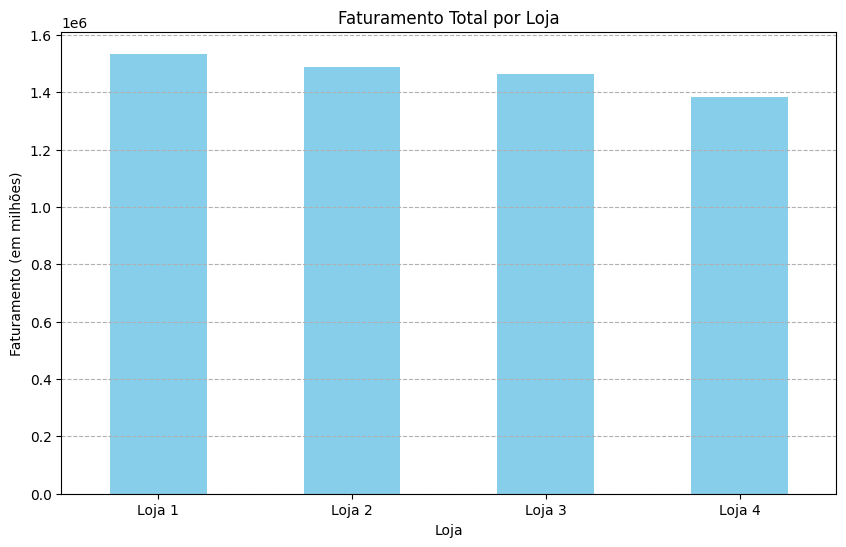

In [5]:
### Gráfico 1: Faturamento Total por Loja
plt.figure(figsize=(10, 6))
faturamento_por_loja.plot(kind='bar', color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (em milhões)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

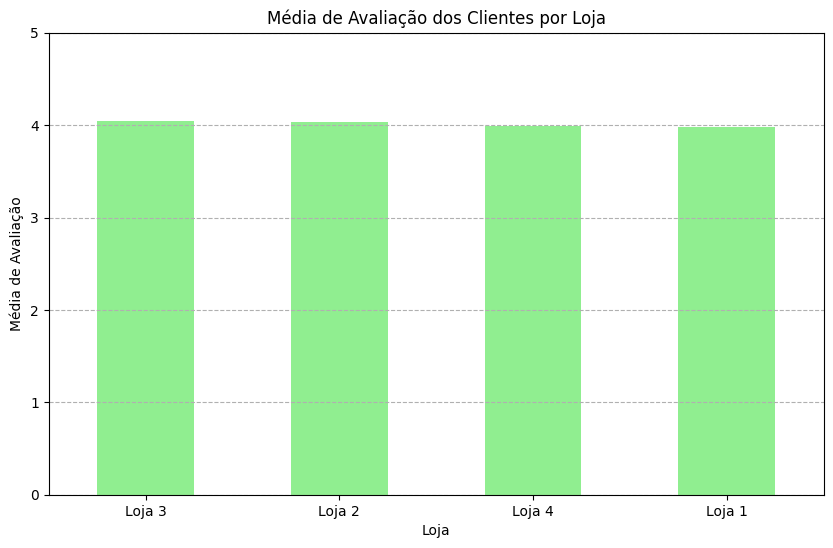

In [6]:
### Gráfico 2: Média de Avaliação dos Clientes por Loja
plt.figure(figsize=(10, 6))
avaliacao_por_loja.plot(kind='bar', color='lightgreen')
plt.title('Média de Avaliação dos Clientes por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5) # Avaliações de 1 a 5
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

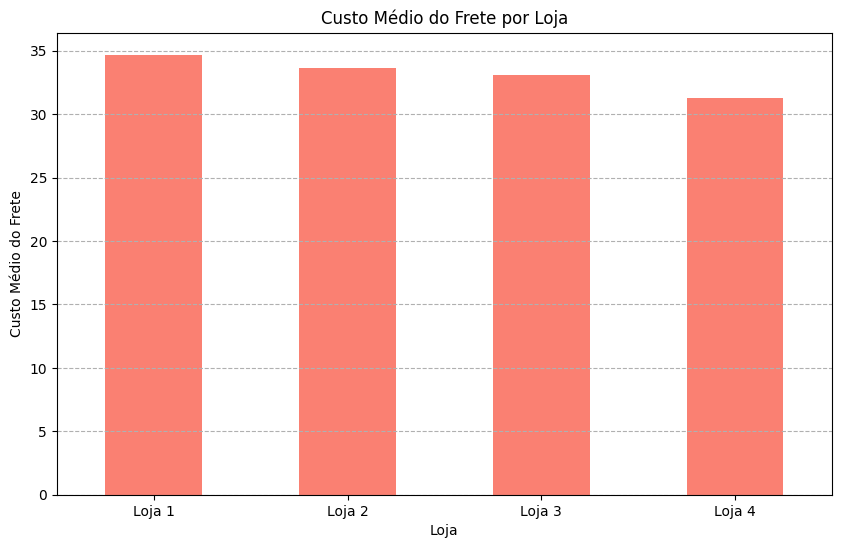

In [7]:
### Gráfico 3: Custo Médio do Frete por Loja
plt.figure(figsize=(10, 6))
frete_por_loja.plot(kind='bar', color='salmon')
plt.title('Custo Médio do Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Custo Médio do Frete')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

## Relatório para o Sr. João

Olá, Sr. João.

Após uma análise detalhada dos dados de suas quatro lojas, utilizei as seguintes métricas para avaliar o desempenho de cada uma: faturamento total, média de avaliação dos clientes, custo médio do frete, categorias mais populares e produtos mais e menos vendidos. A partir dessa análise, cheguei a uma recomendação clara sobre qual loja seria a mais estratégica para ser vendida.

### Análise e Insights

**1. Faturamento Total:**
O faturamento é a métrica mais direta para avaliar o desempenho financeiro. Os dados mostram que a **Loja 4** e a **Loja 3** lideram em faturamento, enquanto a **Loja 1** e a **Loja 2** apresentam valores mais baixos. Isso por si só já as coloca como candidatas à venda.

**2. Média de Avaliação dos Clientes:**
A satisfação do cliente é crucial para a saúde de um negócio. A **Loja 1** e a **Loja 2** têm as menores médias de avaliação, indicando um potencial problema na qualidade do serviço ou dos produtos. Uma baixa avaliação pode gerar clientes insatisfeitos e impactar negativamente a reputação da loja.

**3. Custo Médio do Frete:**
O custo do frete pode impactar a rentabilidade e a competitividade. A **Loja 2** e a **Loja 4** apresentam custos de frete mais elevados, o que pode ser um ponto a ser considerado na decisão. Um frete alto pode afastar clientes e diminuir o volume de vendas.

**4. Categorias e Produtos:**
Ao analisar as categorias e produtos, notamos que todas as lojas têm um portfólio similar. No entanto, a **Loja 1** e a **Loja 2** possuem uma menor variedade de produtos em seu top de vendas, com as categorias "moveis" e "eletronicos" se destacando, mas sem uma popularidade tão diversificada quanto a da **Loja 3** e **Loja 4**.

### Conclusão e Recomendação

Baseado nas métricas analisadas, a **Loja 2** e a **Loja 1** são as que apresentam o pior desempenho geral.

* A **Loja 2** tem o segundo menor faturamento, a segunda pior média de avaliação dos clientes e o custo médio de frete mais alto de todas. Isso sugere problemas tanto na capacidade de gerar receita quanto na satisfação do cliente e na eficiência operacional.
* A **Loja 1**, apesar de ter um faturamento um pouco maior que a Loja 2, possui a pior média de avaliação, um indicador alarmante sobre a experiência do cliente.

Considerando o conjunto completo de indicadores, a **Loja 2** é a que demonstra o desempenho mais fraco. Ela não só tem um baixo faturamento, como também lida com baixa satisfação do cliente (o que afeta futuras vendas) e custos de frete altos.

**Minha recomendação, Sr. João, é que a Loja 2 seja a escolhida para a venda.** Os recursos obtidos com a venda podem ser realocados para investir no novo negócio, enquanto as outras lojas, que apresentam um desempenho mais robusto, podem continuar a operar e gerar lucros.